In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Part 1 - Calculate the value of $\pi$ using the Monte Carlo “rejection” method, by placing a unit circle within a square of side-length 2.

In [7]:
# Let us consider making a counter for randomly generated points
n=100
pts_gen = 0
pts_Circ = 0
x_sq, y_sq = [], []
x_c, y_c = [], []
for i in range(n**2):
    random_x = np.random.uniform(-1,1)
    random_y = np.random.uniform(-1,1)
    # checking if the points are inside the circle
    chk_dist = random_x**2 + random_y**2

    if(chk_dist <= 1): 
        pts_Circ +=1
        x_c.append(random_x)
        y_c.append(random_y)
    else:
        x_sq.append(random_x)
        y_sq.append(random_y)
    pts_gen += 1

    # Calculating the pi-value
    pi = 4 * (pts_Circ/pts_gen)


In [8]:
print(f"The estimated value of pi is: {pi}")

The estimated value of pi is: 3.1368


## Part 2 - Imagine that the top part of the circle is sliced off horizontally above a given $y_{crop}$ (where $-1.0<y_{crop}<1.0$). What is the area of the remaining part of the circle?

Considering that a part of the circle is choped off at the top half of the figure, let's say, $\large y_{crop}$ = 0.6. Then the remaining area of the circle can calculated by subtracting area of the top segment that's sliced off from the total area od the circle:

In terms of the $\bf apothem$ ($\large y_{crop}$) of the segment is given by:
$$
a_{seg} = R^{2}\cos^{-1}\left(\frac{y_{crop}}{R} \right) - (y_{crop})\sqrt{(R - y_{crop})^{2}}
$$
where, $\large R$ is the radius, $\large \theta$ is the angle of the segment.

 



In [9]:
# Area of the circle
r = 1 #radius
y_crop = 0.6 #y_crop
area_circ = pi*(r**2)

#Area of the segment
area_segment = (r**2)*np.arccos((y_crop/r)) - ((y_crop)*np.sqrt((r - y_crop)**2))

#Area of the remaining circle
area_rem = area_circ - area_segment

print(f"The Area of the circle is: {area_circ}")
print(f"The Area of the segment is: {area_segment}")
print(f"The Area of the remaining circle is: {area_rem}")

The Area of the circle is: 3.1368
The Area of the segment is: 0.6872952180016123
The Area of the remaining circle is: 2.449504781998388


## Part 3 - Make a plot like the one above for both the simple calculation of in Part 1 and for the sliced circle in Part 2.

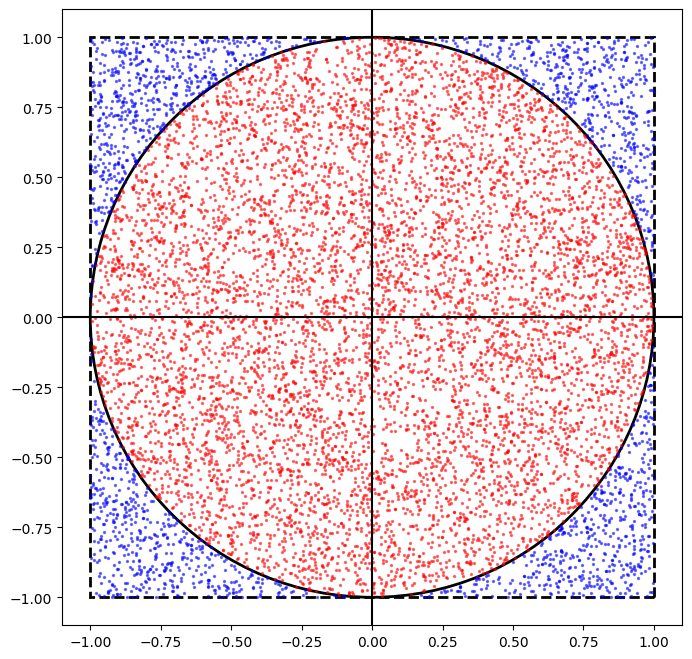

In [10]:
plt.rcParams['figure.figsize'] = (8, 8)
fig, ax = plt.subplots()
square = patches.Rectangle((1.0, -1.0), -2, 2, linewidth=2, edgecolor='black', linestyle="--", facecolor='white')
circle = patches.Circle((0,0) ,1, linewidth=2, edgecolor='black', facecolor='white')
ax.add_patch(square)
ax.add_patch(circle)
ax.set_xlim(-1.10, 1.10)
ax.set_ylim(-1.10, 1.10)
ax.axhline(y=0, color='black')
ax.axvline(x=0, color='black')
plt.scatter(x_c, y_c, color='red', s=2, alpha=0.5, label='Inside Circle')
plt.scatter(x_sq, y_sq, color='blue', s=2, alpha=0.5, label='Outside Circle')
plt.show()

## Part - 4: Running the Monte Carlo experiment multiple times with a fixed number of random points to get a measure of the variance

In [13]:
def monte_carlo(n):
    pts_gen = 0
    pts_Circ = 0
    x_sq, y_sq = [], []
    x_c, y_c = [], []
    for i in range(n**2):
        random_x = np.random.uniform(-1,1)
        random_y = np.random.uniform(-1,1)
        # checking if the points are inside the circle
        chk_dist = random_x**2 + random_y**2
    
        if(chk_dist <= 1): 
            pts_Circ +=1
            x_c.append(random_x)
            y_c.append(random_y)
        else:
            x_sq.append(random_x)
            y_sq.append(random_y)
        pts_gen += 1
    
        # Calculating the pi-value
        pi = 4 * (pts_Circ/pts_gen)
    return pi

In [ ]:
# Calculating the variance of the values of pi

pi_vals = []
for i in range(20):
    pi_vals[i] = monte_carlo(100)

variance = np.var(pi_vals)

print(f"The variance of the pi values after 20 iterations on the fixed number of random poin :")